In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/sales-of-shampoo-over-a-three-ye.csv', header=0,sep=';',parse_dates=True,index_col='Month')
df

,Sales
Month,
01-01,266.0
01-02,145.9
01-03,183.1
01-04,119.3
01-05,180.3
01-06,168.5
01-07,231.8
01-08,224.5
01-09,192.8


In [2]:
df.isnull().sum()

Sales    0
dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Sales'>

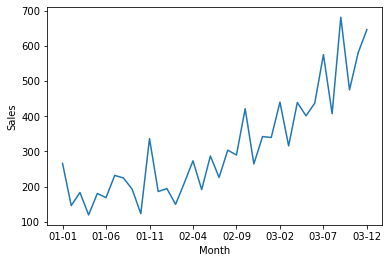

In [3]:
import matplotlib.pyplot as plt
plt.ylabel('Sales')
plt.xlabel('Months')
df['Sales'].plot()


### Model Building

In [4]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [5]:
X = df.values
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [6]:
train, test = X[0:21], X[21:len(X)]

In [7]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [8]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history,order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Predicted={yhat},Expected ={obs}')
error = mean_squared_error(test,predictions)
print(f"TEST MSE :{error}")

C:\Users\joshi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Predicted=[272.96451422],Expected =[421.6]
Predicted=[290.31366212],Expected =[264.5]
Predicted=[349.11764194],Expected =[342.3]
Predicted=[306.51293429],Expected =[339.7]
Predicted=[387.37635503],Expected =[440.4]
Predicted=[348.15422407],Expected =[315.9]
Predicted=[386.30873564],Expected =[439.3]
Predicted=[356.08213522],Expected =[401.3]
Predicted=[446.37949922],Expected =[437.4]
Predicted=[394.73731958],Expected =[575.5]
Predicted=[434.9155186],Expected =[407.6]
Predicted=[507.92333692],Expected =[682.]
Predicted=[435.48297593],Expected =[475.3]
Predicted=[652.74379393],Expected =[581.3]
Predicted=[546.34341033],Expected =[646.9]
TEST MSE :7547.808313002451


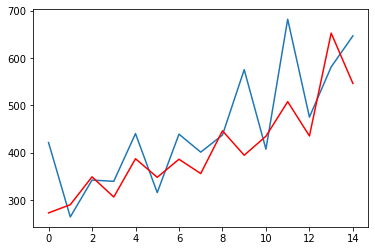

In [9]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# Red is the prediction one and blue is actual values